In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
base_path = "C:/Users/UAL-Laptop/Downloads/batches/"
# data = pd.read_csv(base_path + "batch5.csv")

In [ ]:
data = data.replace("n", 0)
data = data.replace("x", 0)
data = data.replace("d", -1)
data = data.replace("s", 1)

In [ ]:
data.to_csv(base_path + "PBNumeric.csv", index=False)

In [ ]:
s_focus = data.replace(-1, 0)
s_focus.to_csv(base_path + "sPBN.csv", index = False)

d_focus = data.replace(1, 0)
d_focus.to_csv(base_path + "dPBN.csv", index = False)

## Ordering Rows by Rank of "s" and "d"

In [ ]:
import numpy as np

def summer(df):
    values = []
    for i in range(df.shape[0]):
        values.append(np.sum(df.iloc[i]))
        
    indices = np.argsort(values)
    
    df = df.reindex(indices)
    
    return df

In [ ]:
summer(s_focus).to_csv(base_path + "sOrdered.csv", index=False)
summer(d_focus).to_csv(base_path + "dOrdered.csv", index=False)

## Plotting Success Rate by Index of Run

In [ ]:
import matplotlib.pyplot as plt

def success_rate(df):
    rates = []
    for i in range(df.shape[0]):
        rates.append(np.abs(np.sum(df.iloc[i])))
    
    rates = np.divide(rates, 58)
    
    rates.sort()
    
    return rates

In [ ]:
plt.plot(success_rate(d_focus))
plt.title('"d" Focus')
plt.ylabel("Rate")
plt.xlabel("Index")

## Plotting Success Rate by Parameter

In [ ]:
def success_rate(df):
    n = df.shape[0]
    rates = []
    
    column_names = list(df.columns.values)
    for name in column_names:
        column = df[name]
        rates.append(np.abs(np.sum(column) / n))
    
    params = list(np.flip(np.array(column_names)[np.argsort(rates)]))
    
    rates.sort(reverse=True)
    
    return (rates, params)

In [ ]:
plt.figure()
plt.plot(success_rate(d_focus)[0], label='"d" Focus')
plt.plot(success_rate(s_focus)[0], label='"s" Focus')
plt.title('Success Curves')
plt.legend(loc="best")
plt.ylabel("Rate")

In [ ]:
print("d_focus:")
print(success_rate(d_focus)[1], end="\n\n")
print("s_focus:")
print(success_rate(s_focus)[1], end="\n\n")

## Tracking Overall Rankings

1 to 5 points assigned to a parameter based on its ranking appearance. 

In [145]:
import os
import pandas as pd


def success_rate(df):
    n = df.shape[0]
    rates = []
    
    column_names = list(df.columns.values)
    for name in column_names:
        column = df[name]
        rates.append(np.abs(np.sum(column) / n))
    
    params = np.flip(np.array(column_names)[np.argsort(rates)])
    
    rates.sort(reverse=True)
    
    return (rates, params)


# data: dataframe
def focus(data):
    # Replace alphabetical values with numeric values
    data = data.replace("n", 0)
    data = data.replace("x", 0)
    data = data.replace("d", -1)
    data = data.replace("s", 1)
    
    # s and d respectively isolated
    s_focus = data.replace(-1, 0)
    d_focus = data.replace(1, 0)

    return (s_focus, d_focus)


# Find how many batch files there are
# path: path to directory containing batches
def batch_counter(path):
    files = os.listdir(path)
    batches = 0
    for file in files:
        if "batch" in file:
            batches += 1
            
    return batches


# scaled: return proportion or raw numbers
def ranker(base_path, top_x=10, scaled=True):
    # Dictionary storing top ranking parameters (top 5 at least)
    s_ranking_dict = {}
    d_ranking_dict = {}

    print(f"Found {batch_counter(base_path)} batches.")
    
    for i in range(batch_counter(base_path)):
        data = pd.read_csv(base_path + f"batch{i + 1}.csv")

        s_focus, d_focus = focus(data)

        # Extract full ranking set
        s_ranking = success_rate(s_focus)[1]
        d_ranking = success_rate(d_focus)[1]

        # Award points to high ranking variables
        for j in range(top_x):
            if s_ranking[j] not in s_ranking_dict:
                s_ranking_dict[s_ranking[j]] = top_x - j
            else:
                s_ranking_dict[s_ranking[j]] += top_x - j

            if d_ranking[j] not in d_ranking_dict:
                d_ranking_dict[d_ranking[j]] = top_x - j
            else:
                d_ranking_dict[d_ranking[j]] += top_x - j
    
    # returns dictionary proportionally
    if scaled:
        d_sum = sum(d_ranking_dict.values())
        d_ranking_dict = {key: round(value/d_sum, 2) for key, value in d_ranking_dict.items()}
        s_sum = sum(s_ranking_dict.values())
        s_ranking_dict = {key: round(value/s_sum, 2) for key, value in s_ranking_dict.items()}
    
    return (d_ranking_dict, s_ranking_dict)

In [146]:
d_ranking_dict, s_ranking_dict = ranker(base_path, scaled=False)

Found 20 batches.


Text(0, 0.5, 'Score proportion')

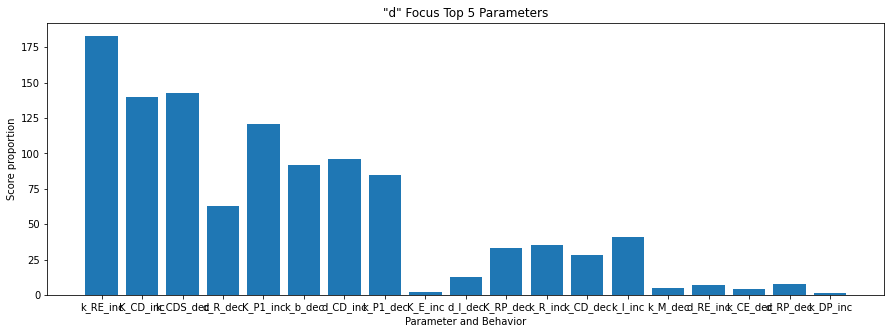

In [149]:
plt.figure(figsize=(15, 5))
plt.bar(d_ranking_dict.keys(), d_ranking_dict.values())
plt.title('"d" Focus Top 5 Parameters')
plt.xlabel("Parameter and Behavior")
plt.ylabel("Score proportion")

Text(0, 0.5, 'Score proportion')

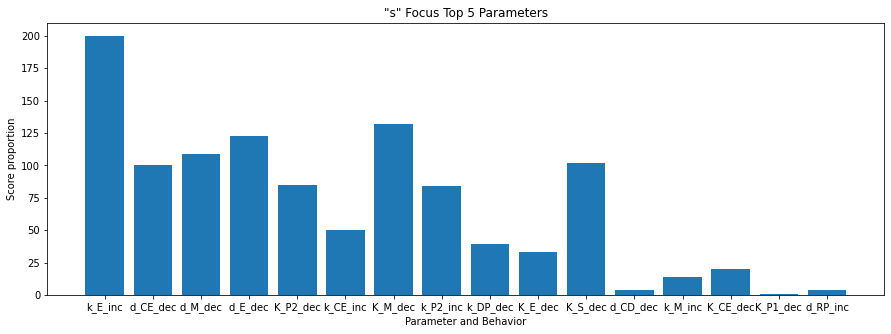

In [150]:
plt.figure(figsize=(15, 5))
plt.bar(s_ranking_dict.keys(), s_ranking_dict.values())
plt.title('"s" Focus Top 5 Parameters')
plt.xlabel("Parameter and Behavior")
plt.ylabel("Score proportion")

## Cumulative Ranking Stabilization

In [10]:
import os
import pandas as pd


def success_rate(df):
    n = df.shape[0]
    rates = []
    
    column_names = list(df.columns.values)
    for name in column_names:
        column = df[name]
        rates.append(np.abs(np.sum(column) / n))
    
    params = np.flip(np.array(column_names)[np.argsort(rates)])
    
    rates.sort(reverse=True)
    
    return (rates, params)


# data: dataframe
def focus(data):
    # Replace alphabetical values with numeric values
    data = data.replace("n", 0)
    data = data.replace("x", 0)
    data = data.replace("d", -1)
    data = data.replace("s", 1)
    
    # s and d respectively isolated
    s_focus = data.replace(-1, 0)
    d_focus = data.replace(1, 0)

    return (s_focus, d_focus)


# Find how many batch files there are
# path: path to directory containing batches
def batch_counter(path):
    files = os.listdir(path)
    batches = 0
    for file in files:
        if "batch" in file:
            batches += 1
            
    return batches


# 1000 total runs into 10 bins of 100
def ranker(base_path, top_n=10):    
    # Dictionary for bins of batches
    bin_s_dict = {}
    bin_d_dict = {}
    
    # Dictionary storing top ranking parameters (top 5 at least)
    s_ranking_dict = {}
    d_ranking_dict = {}

    print(f"Found {batch_counter(base_path)} batches.")

    for i in range(batch_counter(base_path)):
        data = pd.read_csv(base_path + f"batch{i + 1}.csv")

        s_focus, d_focus = focus(data)

        # Extract full ranking set
        s_ranking = success_rate(s_focus)[1]
        d_ranking = success_rate(d_focus)[1]

        # Award points to high ranking variables
        for j in range(top_n):
            if s_ranking[j] not in s_ranking_dict:
                s_ranking_dict[s_ranking[j]] = top_n - j
            else:
                s_ranking_dict[s_ranking[j]] += top_n - j

            if d_ranking[j] not in d_ranking_dict:
                d_ranking_dict[d_ranking[j]] = top_n - j
            else:
                d_ranking_dict[d_ranking[j]] += top_n - j
    
        # Record accumulating rankings
        bin_s_dict[i] = {k: v for k, v in s_ranking_dict.items()}
        bin_d_dict[i] = {k: v for k, v in d_ranking_dict.items()}

    return (bin_d_dict, bin_s_dict)


def rank_and_threshold(bin_dict):
    bin_df = pd.DataFrame(bin_dict)

    last_index = bin_df.shape[1] - 1
    rm_threshold = (last_index * 5)/5

    bin_df = bin_df.fillna(0).astype(int)
    deltas = bin_df[last_index] - bin_df[0]

    remove_specs = []
    for i, val in enumerate(deltas):
        if val < rm_threshold:
            remove_specs.append(deltas.index[i])

    bin_df = bin_df.drop(remove_specs, axis=0)
    
    rank_df = bin_df.rank(0, "min")
    
    return bin_df, rank_df.transpose()


def rank_plotter(rank_df, a_type, save=False):
    final_rankings = rank_df.iloc[-1].to_dict()
    sorted_final = sorted(final_rankings, key=lambda k: final_rankings[k], reverse=True)
    rank_df = rank_df[sorted_final]
    
    plt.figure();
    plt.plot(rank_df)
    plt.legend(rank_df.columns, loc="lower left")
    
    plt.xlabel("Batch Run"); plt.ylabel("Ranking"); plt.title(f"{a_type} Rankings")
    plt.tight_layout()
    
    if save:
        plt.savefig(f"{base_path + a_type}.png", facecolor="white", transparent=False)

Found 41 batches.


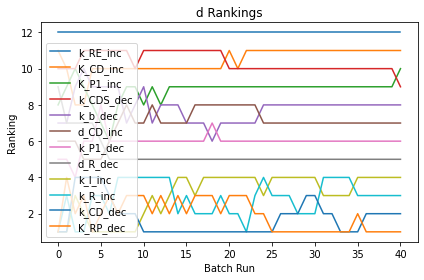

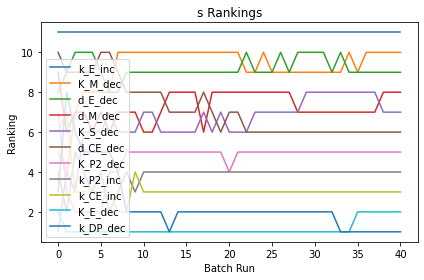

In [11]:
bin_d_dict, bin_s_dict = ranker(base_path)

d_df, d_rank = rank_and_threshold(bin_d_dict)
s_df, s_rank = rank_and_threshold(bin_s_dict)

rank_plotter(d_rank, "d", save=False)
rank_plotter(s_rank, "s", save=False)

In [12]:
final_rankings = d_rank.iloc[-1].to_dict()
sorted_final = sorted(final_rankings, key=lambda k: final_rankings[k], reverse=True)

all_keys = list(bin_d_dict[list(bin_d_dict.keys())[-1]].keys())

# As rankings
write = True

print("Row names are rankings")
print("Column names are batches")

dtop5_dict = {}
for col_index in range(batch_counter(base_path)):
    dtop5_dict[col_index] = tuple(pd.DataFrame(bin_d_dict).nlargest(5, col_index).index.values)

print("Deeper rankings.")
display(pd.DataFrame(dtop5_dict))
if write:
    pd.DataFrame(dtop5_dict).to_csv(base_path + "dtop5_dict.csv", index=False)

stop5_dict = {}
for col_index in range(batch_counter(base_path)):
    stop5_dict[col_index] = tuple(pd.DataFrame(bin_s_dict).nlargest(5, col_index).index.values)

print("Shallower rankings.")
display(pd.DataFrame(stop5_dict))
if write:
    pd.DataFrame(stop5_dict).to_csv(base_path + "stop5_dict.csv", index=False)

Row names are rankings
Column names are batches
Deeper rankings.


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,...,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc,k_RE_inc
1,K_CD_inc,K_CD_inc,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,K_CD_inc,...,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc
2,k_CDS_dec,k_CDS_dec,K_P1_inc,k_b_dec,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,K_CD_inc,k_CDS_dec,...,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,k_CDS_dec,K_P1_inc
3,d_R_dec,K_P1_inc,k_b_dec,K_P1_inc,k_b_dec,k_b_dec,k_b_dec,k_b_dec,K_P1_inc,K_P1_inc,...,K_P1_inc,K_P1_inc,K_P1_inc,K_P1_inc,K_P1_inc,K_P1_inc,K_P1_inc,K_P1_inc,K_P1_inc,k_CDS_dec
4,K_P1_inc,d_R_dec,K_CD_inc,K_CD_inc,K_P1_inc,k_P1_dec,K_P1_inc,K_P1_inc,d_CD_inc,k_b_dec,...,k_b_dec,k_b_dec,k_b_dec,k_b_dec,k_b_dec,k_b_dec,k_b_dec,k_b_dec,k_b_dec,k_b_dec


Shallower rankings.


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,...,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc,k_E_inc
1,d_CE_dec,d_CE_dec,d_E_dec,d_E_dec,d_E_dec,d_CE_dec,d_CE_dec,K_M_dec,K_M_dec,K_M_dec,...,d_E_dec,d_E_dec,d_E_dec,K_M_dec,d_E_dec,K_M_dec,K_M_dec,K_M_dec,K_M_dec,K_M_dec
2,d_M_dec,d_E_dec,d_CE_dec,d_CE_dec,d_CE_dec,d_E_dec,d_E_dec,d_CE_dec,d_E_dec,d_E_dec,...,K_M_dec,K_M_dec,K_M_dec,d_E_dec,K_M_dec,d_E_dec,d_E_dec,d_E_dec,d_E_dec,d_E_dec
3,d_E_dec,k_DP_dec,d_M_dec,K_M_dec,K_M_dec,K_M_dec,K_M_dec,d_E_dec,d_CE_dec,d_CE_dec,...,K_S_dec,K_S_dec,K_S_dec,K_S_dec,K_S_dec,K_S_dec,K_S_dec,d_M_dec,d_M_dec,d_M_dec
4,K_P2_dec,k_CE_inc,K_M_dec,d_M_dec,d_M_dec,d_M_dec,K_S_dec,d_M_dec,d_M_dec,d_M_dec,...,d_M_dec,d_M_dec,d_M_dec,d_M_dec,d_M_dec,d_M_dec,d_M_dec,K_S_dec,K_S_dec,K_S_dec


<Figure size 720x576 with 0 Axes>

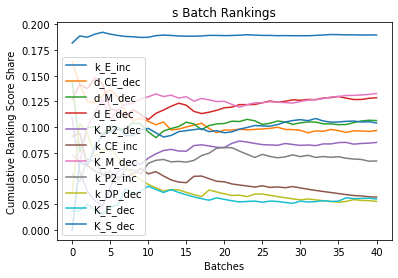

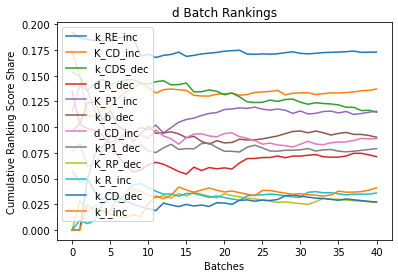

In [13]:
# As curves
import matplotlib.pyplot as plt

for col_num in range(batch_counter(base_path)):
    d_df[col_num] = d_df[col_num].div(d_df[col_num].sum(), axis=0)
    s_df[col_num] = s_df[col_num].div(s_df[col_num].sum(), axis=0)

d_df = d_df.transpose()
s_df = s_df.transpose()

plt.figure(figsize=(10, 8))
for df_type, letter in zip([s_df, d_df], ["s", "d"]):
    plt.figure()
    for name in df_type.columns:
        plt.plot(df_type[[name]], label=name)

    plt.legend(loc="best")
    plt.title(f"{letter} Batch Rankings")
    plt.xlabel("Batches")
    plt.ylabel("Cumulative Ranking Score Share")
    
    plt.savefig(base_path + f"{letter}_ranking_plot.png", facecolor="white", transparent=False)